Querying keyword data...
 -> hmi.v_sht_modes[2014.06.20_00:00:00_TAI]
 -> 2 lines retrieved.
Reading data from 'http://jsoc.stanford.edu/SUM11/D608023042/S00000/m10qr.7840'...


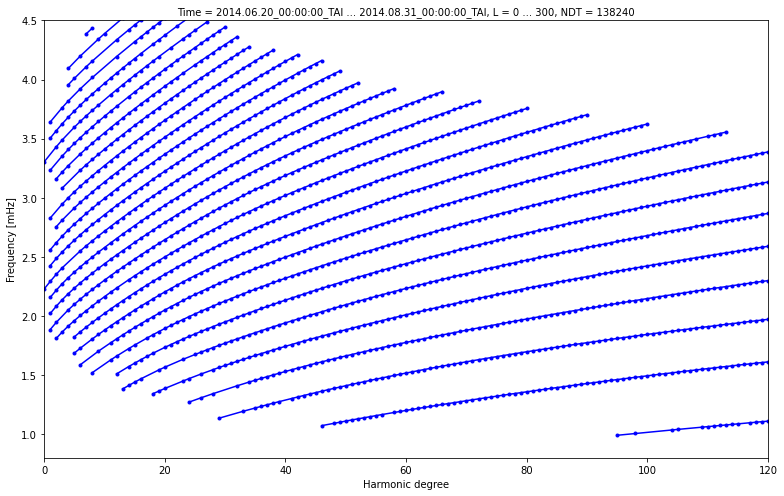

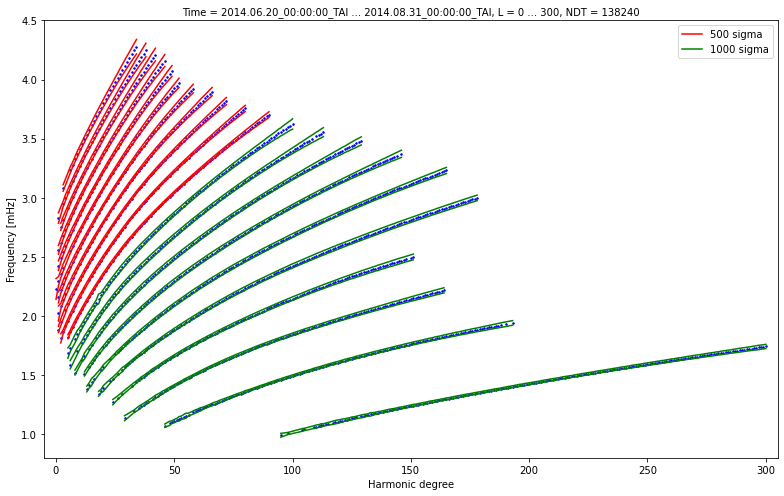

In [1]:
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt
import numpy as np
#import example_helpers
import drms


# Series name, start time and data segment
series = 'hmi.v_sht_modes'
tstart = '2014.06.20_00:00:00_TAI'
segname = 'm6'  # 'm6', 'm18' or 'm36'

# DRMS-Server URL (or shortcut) and data url (if any) for the data segment
drms_url, data_url = 'jsoc', 'http://jsoc.stanford.edu'
#drms_url, data_url = 'kis', ''

# DRMS query string
qstr = '%s[%s]' % (series, tstart)


# Create DRMS JSON client, use debug=True to see the query URLs
c = drms.Client(drms_url)

# Send request to the DRMS server
print('Querying keyword data...\n -> %s' % qstr)
k, s = c.query(
    qstr, key=['T_START', 'T_STOP', 'LMIN', 'LMAX', 'NDT'], seg=segname)
print(' -> %d lines retrieved.' % len(k))

# Use only the first line of the query result
k = k.iloc[0]
fname = data_url + s[segname][0]

# Read the data segment
print('Reading data from %r...' % fname)
a = np.genfromtxt(fname)

# For column names, see appendix of Larson & Schou (2015SoPh..290.3221L)
l = a[:, 0].astype(int)
n = a[:, 1].astype(int)
nu = a[:, 2]/1e3
if a.shape[1] in [24, 48, 84]:
    # tan(gamma) present
    sig_offs = 5
elif a.shape[1] in [26, 50, 86]:
    # tan(gamma) not present
    sig_offs = 6
snu = a[:, sig_offs + 2]/1e3

# Plot: zoomed in on lower l
fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.set_title('Time = %s ... %s, L = %d ... %d, NDT = %d' % (
    k.T_START, k.T_STOP, k.LMIN, k.LMAX, k.NDT), fontsize='medium')
for ni in np.unique(n):
    idx = (n == ni)
    ax.plot(l[idx], nu[idx], 'b.-')
ax.set_xlim(0, 120)
ax.set_ylim(0.8, 4.5)
ax.set_xlabel('Harmonic degree')
ax.set_ylabel('Frequency [mHz]')
fig.tight_layout()

# Plot: higher l, n <= 20, with errors
fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.set_title('Time = %s ... %s, L = %d ... %d, NDT = %d' % (
    k.T_START, k.T_STOP, k.LMIN, k.LMAX, k.NDT), fontsize='medium')
for ni in np.unique(n):
    if ni <= 20:
        idx = (n == ni)
        ax.plot(l[idx], nu[idx], 'b.', ms=3)
        if ni < 10:
            ax.plot(l[idx], nu[idx] + 1000*snu[idx], 'g')
            ax.plot(l[idx], nu[idx] - 1000*snu[idx], 'g')
        else:
            ax.plot(l[idx], nu[idx] + 500*snu[idx], 'r')
            ax.plot(l[idx], nu[idx] - 500*snu[idx], 'r')
ax.legend(loc='upper right', handles=[
    plt.Line2D([0], [0], color='r', label='500 sigma'),
    plt.Line2D([0], [0], color='g', label='1000 sigma')])
ax.set_xlim(-5, 305)
ax.set_ylim(0.8, 4.5)
ax.set_xlabel('Harmonic degree')
ax.set_ylabel('Frequency [mHz]')
fig.tight_layout()

plt.show()